Classification Task:

Decide about a good evaluation strategy and justify your choice. Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. Which model gives the best results?

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from pandas import ExcelWriter

In [2]:
Twitter_Absolute_Sigma = pd.read_table('Twitter-Absolute-Sigma-500.data',sep=",")

In [3]:
Twitter_Absolute_Sigma.columns= ["NCD_0", "NCD_1", "NCD_2", "NCD_3", "NCD_4", "NCD_5", "NCD_6", "AI_0", "AI_1", "AI_2", "AI_3", "AI_4", "AI_5", "AI_6", "AS_NA_0", "AS_NA_1", "AS_NA_2", "AS_NA_3", "AS_NA_4", "AS_NA_5", "AS_NA_6", "BL_0", "BL_1", "BL_2", "BL_3", "BL_4", "BL_5", "BL_6", "NAC_0", "NAC_1", "NAC_2", "NAC_3", "NAC_4", "NAC_5", "NAC_6", "AS_NAC_0", "AS_NAC_1", "AS_NAC_2", "AS_NAC_3", "AS_NAC_4", "AS_NAC_5", "AS_NAC_6", "CS_0", "CS_1", "CS_2", "CS_3", "CS_4", "CS_5", "CS_6", "AT_0", "AT_1", "AT_2", "AT_3", "AT_4", "AT_5", "AT_6", "NA_0", "NA_1", "NA_2", "NA_3", "NA_4", "NA_5", "NA_6", "ADL_0", "ADL_1", "ADL_2", "ADL_3", "ADL_4", "ADL_5", "ADL_6", "NAD_0", "NAD_1", "NAD_2", "NAD_3", "NAD_4", "NAD_5", "NAD_6", "buzz"]

In [4]:
Twitter_Absolute_Sigma.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
count,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,...,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000,140706.000000
mean,172.274729,155.145054,165.458829,176.816085,186.933308,216.202621,243.860276,87.046871,78.635438,84.266001,...,1.113444,1.196132,172.833717,155.625311,165.933031,177.310349,187.459405,216.769711,244.472965,0.197390
std,509.870507,471.570282,495.357468,528.350500,560.330850,632.185796,707.400841,234.729351,218.444310,233.533494,...,1.374292,1.826157,510.935798,472.459796,496.230805,529.285749,561.309068,633.201370,708.435459,0.398031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [5]:
Twitter_Absolute_Sigma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140706 entries, 0 to 140705
Data columns (total 78 columns):
NCD_0       140706 non-null int64
NCD_1       140706 non-null int64
NCD_2       140706 non-null int64
NCD_3       140706 non-null int64
NCD_4       140706 non-null int64
NCD_5       140706 non-null int64
NCD_6       140706 non-null int64
AI_0        140706 non-null int64
AI_1        140706 non-null int64
AI_2        140706 non-null int64
AI_3        140706 non-null int64
AI_4        140706 non-null int64
AI_5        140706 non-null int64
AI_6        140706 non-null int64
AS_NA_0     140706 non-null float64
AS_NA_1     140706 non-null float64
AS_NA_2     140706 non-null float64
AS_NA_3     140706 non-null float64
AS_NA_4     140706 non-null float64
AS_NA_5     140706 non-null float64
AS_NA_6     140706 non-null float64
BL_0        140706 non-null float64
BL_1        140706 non-null float64
BL_2        140706 non-null float64
BL_3        140706 non-null float64
BL_4        14070

In [15]:
#Transforming the predicted buzz column to integer
Twitter_Absolute_Sigma['buzz'] = Twitter_Absolute_Sigma['buzz'].map( {1.0: 1, 0.0: 0} ).astype(int)

In [16]:
X = Twitter_Absolute_Sigma

In [17]:
X= X.drop(['buzz'],axis = 1)
y = Twitter_Absolute_Sigma['buzz']

In [18]:
y.sum()/y.count()

0.19739030318536524

In [19]:
#null accuracy
max(y.mean(), 1 - y.mean())

0.8026096968146348

Bases on the null accuracy and y.sum()/y.count() we see that the dataset is not balanced. AUC is to be used when evaluating models on imbalanced data. 
Hence for this project we consider AUC as a scoring function.

In [20]:
#First for Model Selection we use a 10% randomized data sample
Dummytrain,sample_data,Dummytrain2,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [21]:
X = sample_data
y = sample_target

In [23]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
#We choose the MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_full_scaled = scaler.fit_transform(X)

# KNeighborsClassifier model

In [25]:
model_name = 'KNeighborsClassifier'

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [35]:
train_score = grid_knn.score(X_train, y_train)
test_score = grid_knn.score(X_test, y_test)

In [36]:
best_parameters = str(grid_knn.best_params_)
grid_knn.best_params_

{'n_neighbors': 20}

In [37]:
grid_knn.cv_results_['mean_test_score']

array([0.96912071, 0.97774457, 0.98181645, 0.982144  ])

In [38]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [39]:
from sklearn.metrics import roc_auc_score

auc_train_score = roc_auc_score(y_knn_train_predict, y_train)
auc_test_score = roc_auc_score(y_knn_predict, y_test)

print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.96 


In [40]:
report_table = []

In [43]:
report_table = [[model_name, best_parameters, train_score, test_score, auc_train_score, auc_test_score]]

report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy', 'Train AUC Score', 'Test AUC Score']).set_index('Model', drop=True)
writer = ExcelWriter('ClassificationReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

,Best Parameters,Train accuracy,Test accuracy,Train AUC Score,Test AUC Score
Model,,,,,
KNeighborsClassifier,{'n_neighbors': 20},0.99284,0.98236,0.955569,0.955244


# LogisticRegression

In [47]:
model_name = 'LogisticRegression'

logreg = LogisticRegression()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_LogisticRegression = GridSearchCV(logreg, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [48]:
grid_LogisticRegression.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [49]:
best_parameters = str(grid_LogisticRegression.best_params_)
grid_LogisticRegression.best_params_

{'C': 100}

In [50]:
train_score = grid_LogisticRegression.score(X_train, y_train)
test_score = grid_LogisticRegression.score(X_test, y_test)

In [51]:
y_logreg_predict_train = grid_LogisticRegression.predict(X_train)

In [52]:
y_logreg_predict = grid_LogisticRegression.predict(X_test)

In [53]:
auc_train_score = roc_auc_score(y_logreg_predict_train, y_train)
auc_test_score = roc_auc_score(y_logreg_predict, y_test)

In [54]:
report_table = report_table + [[model_name, best_parameters, train_score, test_score, auc_train_score, auc_test_score]]

report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy', 'Train AUC Score', 'Test AUC Score']).set_index('Model', drop=True)
writer = ExcelWriter('ClassificationReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

,Best Parameters,Train accuracy,Test accuracy,Train AUC Score,Test AUC Score
Model,,,,,
KNeighborsClassifier,{'n_neighbors': 20},0.992840,0.982360,0.955569,0.955244
LogisticRegression,{'C': 100},0.992184,0.991584,0.955776,0.949502


# SVC linear support vector machines (linear SVMs)¶

In [55]:
model_name = 'LinearSVC'

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [56]:
grid_svc_lin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [57]:
best_parameters = str(grid_svc_lin.best_params_)
grid_svc_lin.best_params_

{'C': 10}

In [58]:
train_score = grid_svc_lin.score(X_train, y_train)
test_score =  grid_svc_lin.score(X_test, y_test)

In [59]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)

In [60]:
auc_train_score = roc_auc_score(y_svc_lin_predict_train, y_train)
auc_test_score = roc_auc_score(y_svc_lin_predict, y_test)

In [61]:
report_table = report_table + [[model_name, best_parameters, train_score, test_score, auc_train_score, auc_test_score]]

report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy', 'Train AUC Score', 'Test AUC Score']).set_index('Model', drop=True)
writer = ExcelWriter('ClassificationReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

,Best Parameters,Train accuracy,Test accuracy,Train AUC Score,Test AUC Score
Model,,,,,
KNeighborsClassifier,{'n_neighbors': 20},0.992840,0.982360,0.955569,0.955244
LogisticRegression,{'C': 100},0.992184,0.991584,0.955776,0.949502
LinearSVC,{'C': 10},0.992256,0.991565,0.958279,0.955885


# Kernalized SVM

In [62]:
model_name = 'KernelSVC'

C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [0.01, 0.1, 1, 10, 100]
svc_param_grid = dict(gamma=gamma_range, C=C_range)
#When nothing is passed to the Kernel parameter by default it takes 'rbf'
grid_SVC_rbf = GridSearchCV(SVC(), svc_param_grid, cv = 5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
grid_SVC_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gamma': [0.01, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [63]:
best_parameters = str(grid_SVC_rbf.best_params_)
grid_SVC_rbf.best_params_

{'C': 100, 'gamma': 0.1}

In [64]:
train_score = grid_SVC_rbf.score(X_train, y_train)
test_score = grid_SVC_rbf.score(X_test, y_test)

In [65]:
y_SVM_predict_train = grid_SVC_rbf.predict(X_train)
y_SVM_predict_test = grid_SVC_rbf.predict(X_test)

In [66]:
auc_train_score = roc_auc_score(y_SVM_predict_train, y_train)
auc_test_score = roc_auc_score(y_SVM_predict_test, y_test)

In [67]:
report_table = report_table + [[model_name, best_parameters, train_score, test_score, auc_train_score, auc_test_score]]

report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy', 'Train AUC Score', 'Test AUC Score']).set_index('Model', drop=True)
writer = ExcelWriter('ClassificationReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

,Best Parameters,Train accuracy,Test accuracy,Train AUC Score,Test AUC Score
Model,,,,,
KNeighborsClassifier,{'n_neighbors': 20},0.992840,0.982360,0.955569,0.955244
LogisticRegression,{'C': 100},0.992184,0.991584,0.955776,0.949502
LinearSVC,{'C': 10},0.992256,0.991565,0.958279,0.955885
KernelSVC,"{'C': 100, 'gamma': 0.1}",0.991328,0.990294,0.956659,0.950439


# Decision Tree

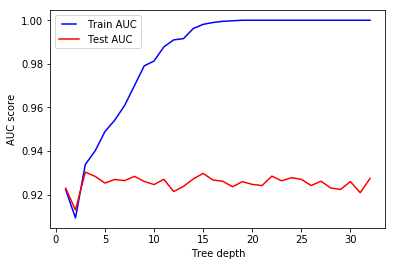

In [68]:
model_name = 'DecisionTree'

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [69]:
#From the graph we can clearly see that the model is overfitting for tree depth > ~5

dtc =DecisionTreeClassifier()
param_grid = {'max_depth': [3,4,5,6]}
grid_dtree = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc')
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [71]:
best_parameters = str(grid_dtree.best_params_)
grid_dtree.best_params_

{'max_depth': 3}

In [72]:
train_score = grid_dtree.score(X_train,y_train)
test_score = grid_dtree.score(X_test, y_test)

In [73]:
y_dtree_predict_train = grid_dtree.predict(X_train)
y_dtree_predict_test = grid_dtree.predict(X_test)

In [74]:
auc_train_score = roc_auc_score(y_dtree_predict_train, y_train)
auc_test_score = roc_auc_score(y_dtree_predict_test, y_test)

In [ ]:
report_table = report_table + [[model_name, best_parameters, train_score, test_score, auc_train_score, auc_test_score]]

In [93]:
report_tabledf = pd.DataFrame(report_table, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy', 'Train AUC Score', 'Test AUC Score']).set_index('Model', drop=True)
writer = ExcelWriter('ClassificationReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
report_tabledf

,Best Parameters,Train accuracy,Test accuracy,Train AUC Score,Test AUC Score
Model,,,,,
KNeighborsClassifier,{'n_neighbors': 20},0.992840,0.982360,0.955569,0.955244
LogisticRegression,{'C': 100},0.992184,0.991584,0.955776,0.949502
LinearSVC,{'C': 10},0.992256,0.991565,0.958279,0.955885
KernelSVC,"{'C': 100, 'gamma': 0.1}",0.991328,0.990294,0.956659,0.950439
DecisionTree,{'max_depth': 3},0.986085,0.980464,0.955950,0.941574


# Model Selection
From the report we can see that Linear SVC has the highest train AUC score and also highest test AUC score. Hence will choose Linear SVC as the best model for this dataset

Final model

Running Linear SVC on the entire dataset

In [94]:
model_name = 'LinearSVC'
X_final = Twitter_Absolute_Sigma
X_final= X_final.drop(['buzz'],axis = 1)
y_final = Twitter_Absolute_Sigma['buzz']

X_train_org, X_test_org, y_train_final, y_test_final = train_test_split(X_final, y_final, random_state=0)

In [99]:
#We choose the MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_org)
X_test_final = scaler.transform(X_test_org)

X_full_scaled = scaler.fit_transform(X)

In [100]:
svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

grid_svc_lin.fit(X_train_final, y_train_final)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [105]:
best_parameters = str(grid_svc_lin.best_params_)
grid_svc_lin.best_params_

{'C': 1}

In [106]:
train_score = grid_svc_lin.score(X_train_final, y_train_final)
test_score = grid_svc_lin.score(X_test_final, y_test_final)

In [107]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train_final)
y_svc_lin_predict = grid_svc_lin.predict(X_test_final)

In [108]:
model_name = 'LinearSVC'
final_report = []
final_report = [[model_name, best_parameters, train_score, test_score, auc_train_score, auc_test_score]]

final_reportdf = pd.DataFrame(final_report, columns = ['Model', 'Best Parameters', 'Train accuracy', 'Test accuracy', 'Train AUC Score', 'Test AUC Score']).set_index('Model', drop=True)
writer = ExcelWriter('ClassificationFinalReport.xlsx')
report_tabledf.to_excel(writer,'Sheet1')
writer.save()
final_reportdf

,Best Parameters,Train accuracy,Test accuracy,Train AUC Score,Test AUC Score
Model,,,,,
LinearSVC,{'C': 1},0.991305,0.992105,0.95595,0.941574


In [109]:
final_report

[['LinearSVC',
  "{'C': 1}",
  0.9913051647476957,
  0.992104740282261,
  0.9559502123242883,
  0.941574081838001]]

In [110]:
y_svc_lin_predict
y_svc_lin_predict_list = list(y)
y_svc_lin_predict_list.count(1)

2739

In [111]:
y_svc_lin_predict_list.count(0)

11332

In [112]:
buzz_predicted = (y_svc_lin_predict_list.count(1) / (y_svc_lin_predict_list.count(1) + y_svc_lin_predict_list.count(0)))

In [113]:
print('Buzz predicted percentage = ',(buzz_predicted*100))

Buzz predicted percentage =  19.465567479212563


# Comprehensive Report for the Classification task

Preprocessing:
•	Checking missing values – no missing values found
•	Renamed the column names based on the feature labels
•	Cleaned the buzz column to convert it to binary
•	Generated X and y – kept all the features in X dataset and kept the buzz column in y
Classification Strategy:
As the dataset is imbalanced, we selected AUC has the appropriate evaluation strategy

Best parameters for each model:
KNN - n_neighbors: 20
Logistic Regression - C: 100
Linear SVC - C: 10
SVM RBF kernel  - C': 100, 'gamma': 0.1
Decision Tree  - Max_depth – 3

Best Model:
Based on Train AUC score and Test AUC score – Linear SVC is the best model

Results after running Linear SVC on the entire dataset:
Model name	- LinearSVC
Model parameter  -	 C = 1
Train accuracy	- 0.9913051647476957
Test accuracy	- 0.992104740282261
Train auc score	- 0.9559502123242883
Test auc score	- 0.941574081838001

Buzz predicted percentage =  19.46%